In [100]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import data_cleaning as clean
import visualizations as vis
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%load_ext autoreload
%autoreload 2

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [102]:
df = clean.full_clean()

## H1: Owners regardless of their genders pay their employees equally

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11231 entries, 0 to 15112
Data columns (total 22 columns):
emp               11231 non-null int64
empszfi           11231 non-null int64
empszfi_ttl       11231 non-null object
eth_group         11231 non-null int64
eth_group_ttl     11231 non-null object
firmpdemp         11231 non-null int64
geotype           11231 non-null int64
naics2012         11231 non-null object
naics2012_ttl     11231 non-null object
payann            11231 non-null int64
race_group        11231 non-null int64
race_group_ttl    11231 non-null object
rcppdemp          11231 non-null int64
rcpszfi           11231 non-null int64
rcpszfi_ttl       11231 non-null object
sex               11231 non-null int64
sex_ttl           11231 non-null object
vet_group         11231 non-null int64
vet_group_ttl     11231 non-null object
payann_log        11231 non-null float64
emp_log           11231 non-null float64
rcppdemp_log      11231 non-null float64
dtypes: float64(3),

In [103]:
df_sex_female = df.loc[df.sex == 2]
df_sex_male = df.loc[df.sex == 3]
df_sex_both = df.loc[df.sex == 4]

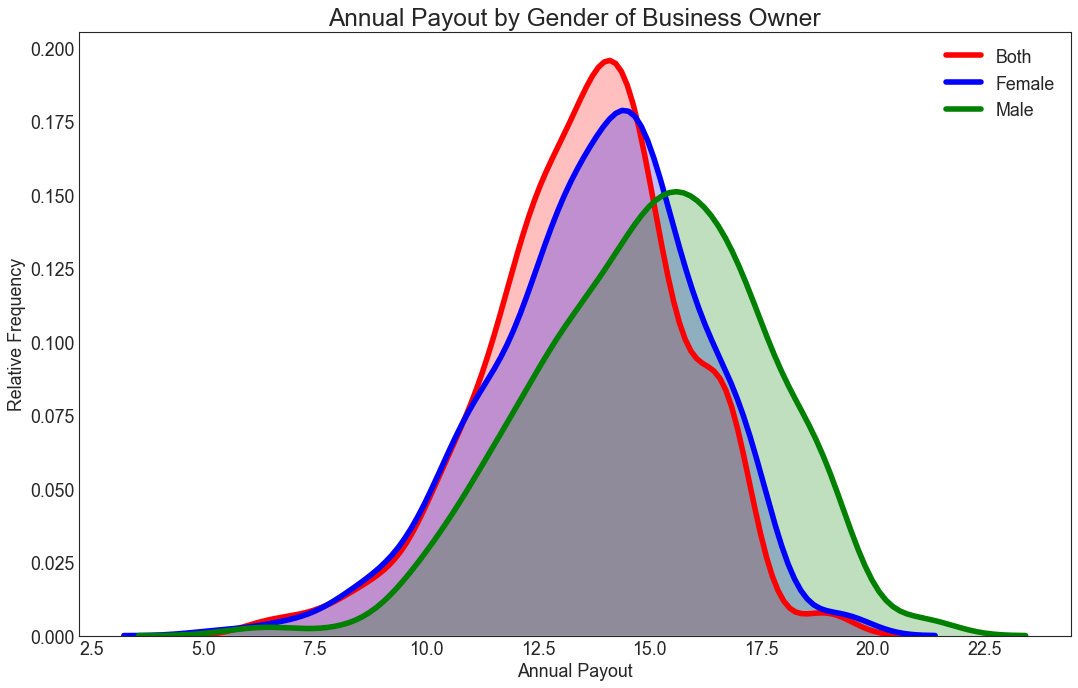

In [104]:
h1_target_vars = [df_sex_both.payann_log,df_sex_female.payann_log,df_sex_male.payann_log]
h1_input_vars =['Both', 'Female', "Male"]
fig1 = vis.visualization_one1(target_vars=h1_target_vars, input_vars=h1_input_vars)

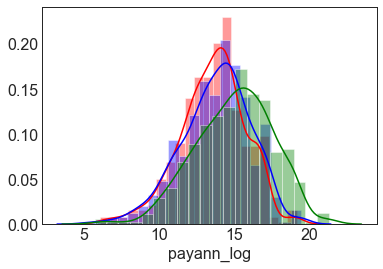

In [5]:
sns.distplot(df_sex_both.payann_log,color="red")
sns.distplot(df_sex_female.payann_log,color="blue")
sns.distplot(df_sex_male.payann_log,color="green")

In [6]:
# Normality test
from scipy import stats
print(stats.shapiro(df_sex_female.payann_log))
print(stats.shapiro(df_sex_male.payann_log))
print(stats.shapiro(df_sex_both.payann_log))

(0.9868340492248535, 4.050735878990963e-05)
(0.9903426170349121, 0.00012920578592456877)
(0.9868038296699524, 2.6033574613393284e-05)


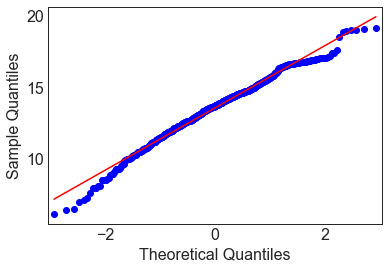

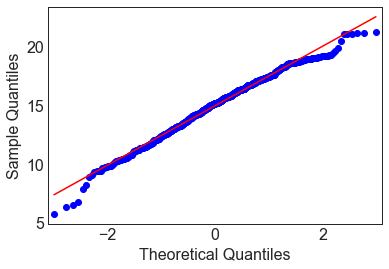

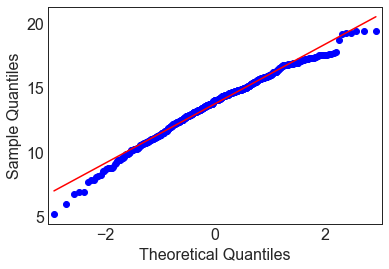

In [7]:
# QQ plot
import statsmodels.api as sm
import pylab
sm.qqplot(df_sex_both.payann_log,line='s')
sm.qqplot(df_sex_male.payann_log,line='s')
sm.qqplot(df_sex_female.payann_log,line='s')
pylab.show()

In [8]:
# non-parametric test that is an equivalent to one-way anova 
df_sex_female_payann_list = list(df_sex_female.payann_log)
df_sex_male_payann_list = list(df_sex_male.payann_log)
df_sex_both_payann_list = list(df_sex_both.payann_log)

from scipy.stats import mstats
pval_sex = mstats.kruskalwallis(df_sex_both_payann_list,df_sex_female_payann_list,df_sex_male_payann_list)
pval_sex

KruskalResult(statistic=132.868523906642, pvalue=1.4059394731685496e-29)

In [9]:
# one-way ANOVA based on the nicely distributed QQ plot
stats.f_oneway(df_sex_female_payann_list, df_sex_male_payann_list, df_sex_both_payann_list)

F_onewayResult(statistic=72.64489509789207, pvalue=3.964952631136359e-31)

### this part in # I haven't finish yet, planning to do some barplot or violin plot

In [10]:
# df_sex_payann = df

In [11]:
# df_sex_payann = df_sex_payann.loc[(df_sex_payann.sex >1 ) & (df_sex_payann.sex < 5)]

In [12]:
# g = sns.catplot(x="class", y="survived", hue="sex", data=titanic,
#                 height=6, kind="bar", palette="muted")
# g.despine(left=True)

In [13]:
# posthoc = pg.pairwise_ttests()

In [14]:
# >>> import scipy.stats as ss
# >>> import statsmodels.api as sa
# >>> import scikit_posthocs as sp
# >>> df = sa.datasets.get_rdataset('iris').data
# >>> data = [df.loc[ids, 'Sepal.Width'].values for ids in df.groupby('Species').groups.values()]

In [15]:
# >>> H, p = ss.kruskal(*data)
# >>> p

In [16]:
# >>> sp.posthoc_conover(df, val_col='Sepal.Width', group_col='Species', p_adjust = 'holm')

## H2: Owners regardless of their genders hire equal number of paid-employees

In [17]:
df_sex_female = df_sex_female.loc[df_sex_female.emp_log > 0]
df_sex_male = df_sex_male.loc[df_sex_male.emp_log > 0]
df_sex_both = df_sex_both.loc[df_sex_both.emp_log > 0]

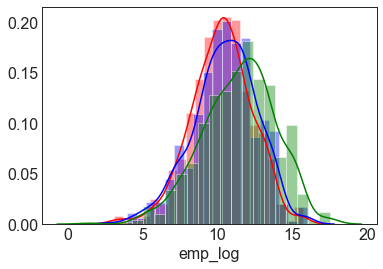

In [18]:
sns.distplot(df_sex_both.emp_log,color="red")
sns.distplot(df_sex_female.emp_log,color="blue")
sns.distplot(df_sex_male.emp_log,color="green")

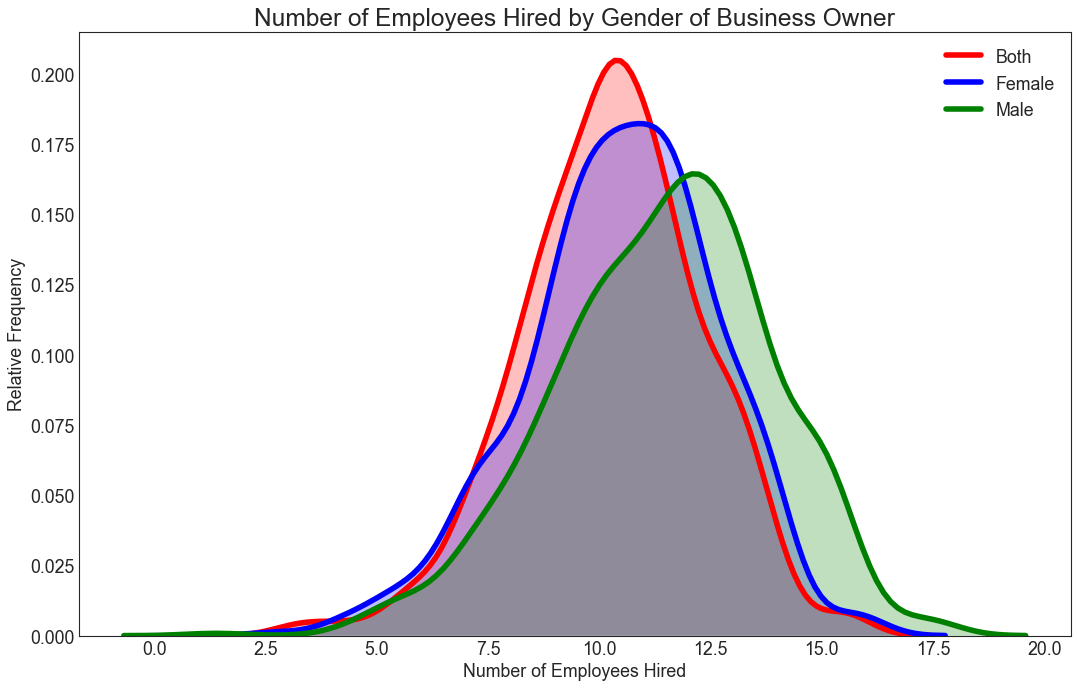

In [105]:
h2_target_vars = [df_sex_both.emp_log,df_sex_female.emp_log,df_sex_male.emp_log]
h2_input_vars =['Both', 'Female', "Male"]
fig2 = vis.visualization_two2(target_vars=h2_target_vars, input_vars=h2_input_vars)

In [22]:
print(stats.shapiro(df_sex_female.emp_log))
print(stats.shapiro(df_sex_male.emp_log))
print(stats.shapiro(df_sex_both.emp_log))

(0.9906202554702759, 0.0011521837441250682)
(0.990779459476471, 0.0002505732700228691)
(0.9926711320877075, 0.00537367258220911)


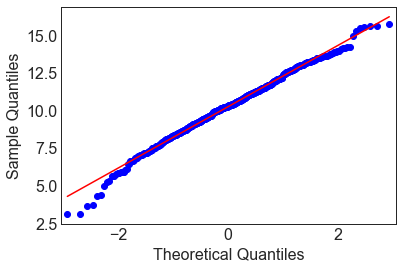

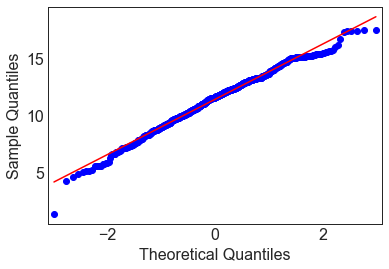

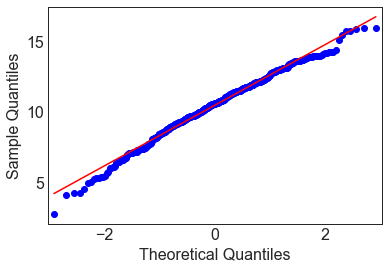

In [23]:
sm.qqplot(df_sex_both.emp_log,line='s')
sm.qqplot(df_sex_male.emp_log,line='s')
sm.qqplot(df_sex_female.emp_log,line='s')
pylab.show()

In [24]:
# non-parametric test
df_sex_female_emp_list = list(df_sex_female.emp_log)
df_sex_male_emp_list = list(df_sex_male.emp_log)
df_sex_both_emp_list = list(df_sex_both.emp_log)
from scipy.stats import mstats
pval_sex_hire = mstats.kruskalwallis(df_sex_both_emp_list,df_sex_female_emp_list,df_sex_male_emp_list)
pval_sex_hire

KruskalResult(statistic=98.19896539222458, pvalue=4.746413830053969e-22)

In [25]:
# ANOVA
stats.f_oneway(df_sex_female_emp_list, df_sex_male_emp_list, df_sex_both_emp_list)

F_onewayResult(statistic=50.39405257513997, pvalue=4.902407055480284e-22)

# subset df by vet status

## H3: Owners regardless of their vet status pay their employees equally

In [64]:
df_vet_vet = df.loc[df.vet_group == 2]
df_vet_equal = df.loc[df.vet_group == 3]
df_vet_nonvet = df.loc[df.vet_group == 4]

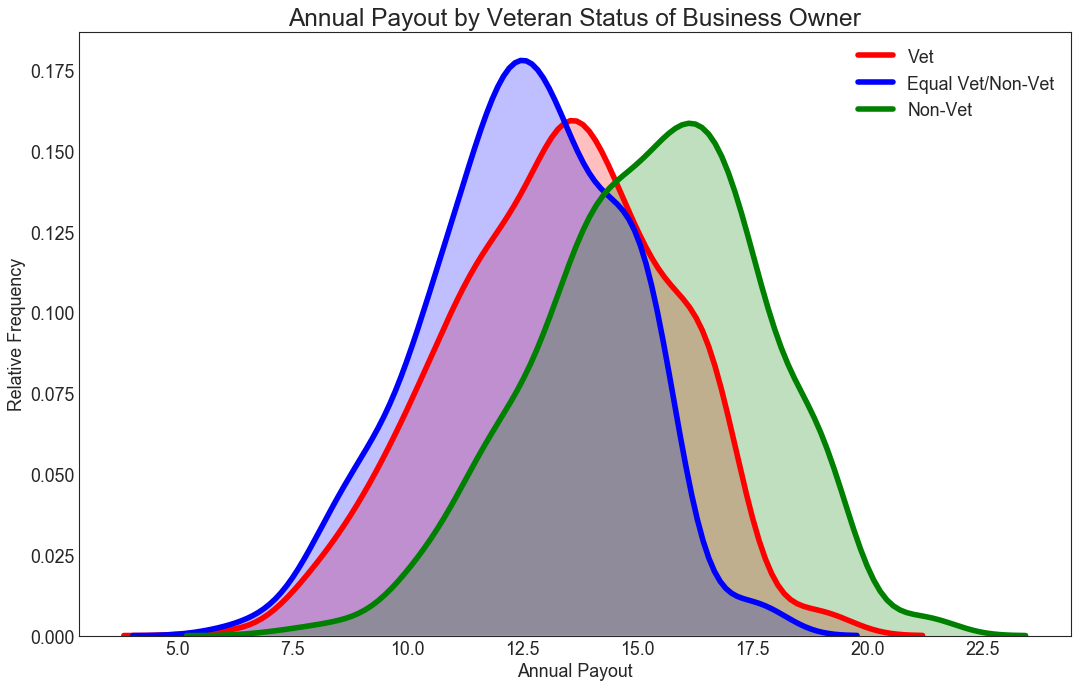

In [106]:
h3_target_vars = [df_vet_vet.payann_log,df_vet_equal.payann_log,df_vet_nonvet.payann_log]
h3_input_vars =['Vet', 'Equal Vet/Non-Vet', "Non-Vet"]
fig3 = vis.visualization_three3(target_vars=h3_target_vars, input_vars=h3_input_vars)

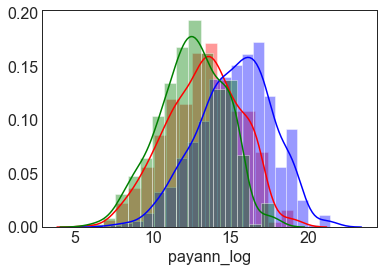

In [27]:
sns.distplot(df_vet_vet.payann_log,color="red")
sns.distplot(df_vet_nonvet.payann_log,color="blue")
sns.distplot(df_vet_equal.payann_log,color="green")

In [28]:
print(stats.shapiro(df_vet_vet.payann_log))
print(stats.shapiro(df_vet_nonvet.payann_log))
print(stats.shapiro(df_vet_equal.payann_log))

(0.9905403256416321, 0.001498038531281054)
(0.9928749203681946, 0.0015369491884484887)
(0.9909448623657227, 0.006889177951961756)


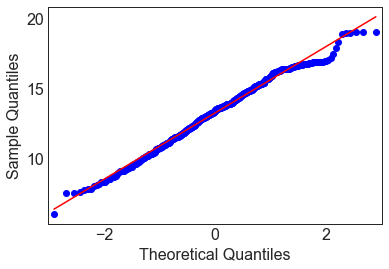

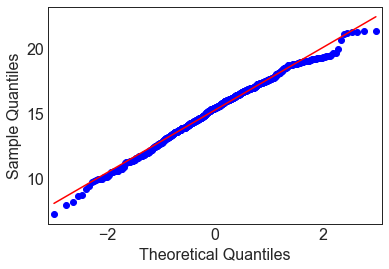

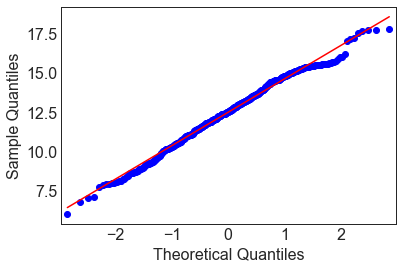

In [29]:
sm.qqplot(df_vet_vet.payann_log,line='s')
sm.qqplot(df_vet_nonvet.payann_log,line='s')
sm.qqplot(df_vet_equal.payann_log,line='s')
pylab.show()

In [30]:
# non-parametric test
df_vet_vet_payann_list = list(df_vet_vet.payann_log)
df_vet_non_payann_list = list(df_vet_nonvet.payann_log)
df_vet_equal_payann_list = list(df_vet_equal.payann_log)

from scipy.stats import mstats
pval_vet = mstats.kruskalwallis(df_vet_vet_payann_list,df_vet_non_payann_list,df_vet_equal_payann_list)
pval_vet

KruskalResult(statistic=362.63451327869484, pvalue=1.7985228825126e-79)

In [31]:
# ANOVA
stats.f_oneway(df_vet_vet_payann_list, df_vet_non_payann_list, df_vet_equal_payann_list)

F_onewayResult(statistic=228.3797025079474, pvalue=1.0901717157802883e-88)

## H4: Owners regardless of their vet status hire equal number of paid-employees

In [32]:
df_vet_vet = df_vet_vet.loc[df_vet_vet.emp_log > 0]
df_vet_nonvet = df_vet_nonvet.loc[df_vet_nonvet.emp_log > 0]

In [33]:
df_vet_nonvet['emp_log'] = df_vet_nonvet.emp.apply(np.log)
df_vet_nonvet = df_vet_nonvet.loc[df_vet_nonvet.emp_log > 0]
df_vet_equal = df_vet_equal.loc[df_vet_equal.emp_log > 0]

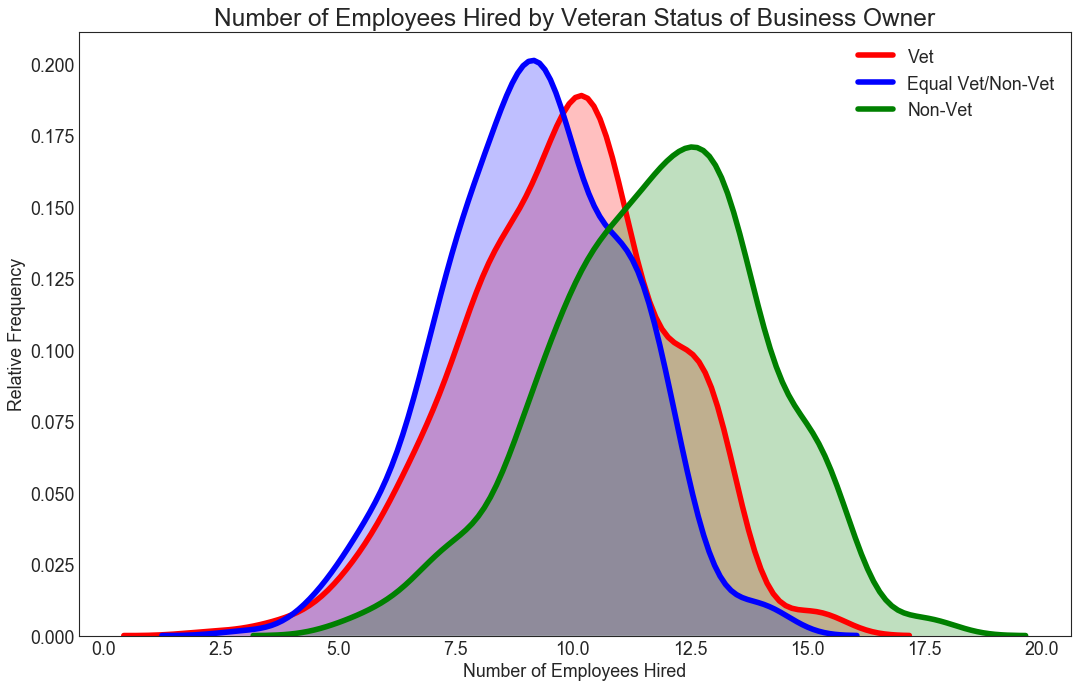

In [108]:
h4_target_vars = [df_vet_vet.emp_log,df_vet_equal.emp_log,df_vet_nonvet.emp_log]
h4_input_vars =['Vet', 'Equal Vet/Non-Vet', "Non-Vet"]
fig4 = vis.visualization_four4(target_vars=h4_target_vars, input_vars=h4_input_vars)

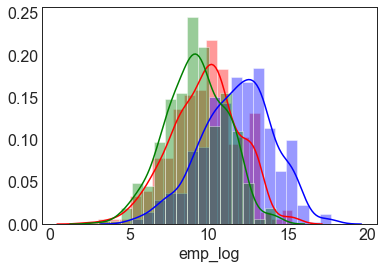

In [34]:
sns.distplot(df_vet_vet.emp_log,color="red")
sns.distplot(df_vet_nonvet.emp_log,color="blue")
sns.distplot(df_vet_equal.emp_log,color="green")

In [35]:
print(stats.shapiro(df_vet_vet.emp_log))
print(stats.shapiro(df_vet_nonvet.emp_log))
print(stats.shapiro(df_vet_equal.emp_log))

(0.9932880401611328, 0.019321443513035774)
(0.9933056235313416, 0.003016451606526971)
(0.996030867099762, 0.3333069384098053)


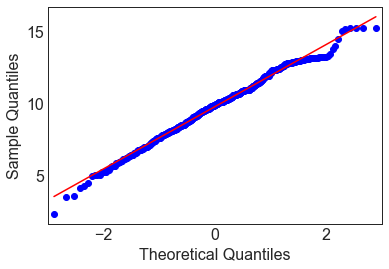

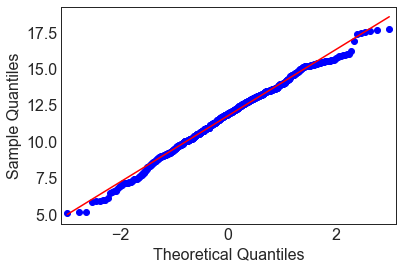

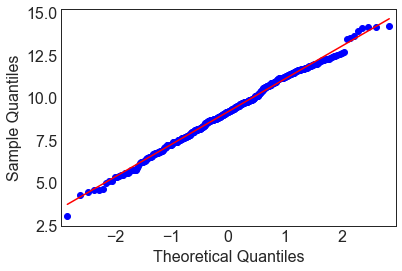

In [36]:
sm.qqplot(df_vet_vet.emp_log,line='s')
sm.qqplot(df_vet_nonvet.emp_log,line='s')
sm.qqplot(df_vet_equal.emp_log,line='s')
pylab.show()

In [37]:
df_vet_vet_emp_list = list(df_vet_vet.emp_log)
df_vet_nonvet_emp_list = list(df_vet_nonvet.emp_log)
df_vet_equal_emp_list = list(df_vet_equal.emp_log)
from scipy.stats import mstats
pval_vet_hire = mstats.kruskalwallis(df_vet_vet_emp_list,df_vet_nonvet_emp_list,df_vet_equal_emp_list)
pval_vet_hire

KruskalResult(statistic=372.75953027268446, pvalue=1.1384041305575102e-81)

In [38]:
stats.f_oneway(df_vet_vet_emp_list, df_vet_nonvet_emp_list, df_vet_equal_emp_list)

F_onewayResult(statistic=234.05730121473715, pvalue=2.3997554414850556e-90)

# starting from here I have not update the code yet

# Subset by Ethnicity

## H5: Ethnicity and pay

In [39]:
df_race = df
df_race.race_group = df_race.race_group.apply(pd.to_numeric)

In [40]:
df_race['payann_log'] = df_race.payann.apply(np.log)
# df_race['emp_log'] = df_race.emp.apply(np.log)
# df_race['rcppdemp_log'] = df_race.rcppdemp.apply(np.log)

In [41]:
df_race = df_race.loc[df_race.payann_log > 0]
# df_race = df_race.loc[df_race.rcppdemp_log > 0]
# df_race = df_race.loc[df_race.emp_log > 0]

In [42]:
df_race = df_race.loc[(df_race.race_group > 89) & (df_race.race_group < 93)]

In [43]:
df_race.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1367 entries, 399 to 14921
Data columns (total 22 columns):
emp               1367 non-null int64
empszfi           1367 non-null int64
empszfi_ttl       1367 non-null object
eth_group         1367 non-null int64
eth_group_ttl     1367 non-null object
firmpdemp         1367 non-null int64
geotype           1367 non-null int64
naics2012         1367 non-null object
naics2012_ttl     1367 non-null object
payann            1367 non-null int64
race_group        1367 non-null int64
race_group_ttl    1367 non-null object
rcppdemp          1367 non-null int64
rcpszfi           1367 non-null int64
rcpszfi_ttl       1367 non-null object
sex               1367 non-null int64
sex_ttl           1367 non-null object
vet_group         1367 non-null int64
vet_group_ttl     1367 non-null object
payann_log        1367 non-null float64
emp_log           1367 non-null float64
rcppdemp_log      1367 non-null float64
dtypes: float64(3), int64(11), object(8)

In [77]:
df_race

,emp,empszfi,empszfi_ttl,eth_group,eth_group_ttl,firmpdemp,geotype,naics2012,naics2012_ttl,payann,race_group,race_group_ttl,rcppdemp,rcpszfi,rcpszfi_ttl,sex,sex_ttl,vet_group,vet_group_ttl,payann_log,emp_log,rcppdemp_log
399,5233022,1,All firms,1,All firms,601129,1,00,Total for all sectors,167058043,92,Nonminority,813616081,1,All firms,4,Equally male-/female-owned,1,All firms,18.933852,15.470499,20.516999
499,7574718,1,All firms,1,All firms,949318,1,00,Total for all sectors,237454362,90,Minority,1089710187,1,All firms,1,All firms,1,All firms,19.285486,15.840327,20.809178
500,546936,1,All firms,1,All firms,122564,1,00,Total for all sectors,13510823,90,Minority,67816887,1,All firms,1,All firms,1,All firms,16.419002,13.212087,18.032322
501,1015134,1,All firms,1,All firms,179525,1,00,Total for all sectors,23416818,90,Minority,115773790,1,All firms,1,All firms,1,All firms,16.968965,13.830531,18.567149
502,823500,1,All firms,1,All firms,125182,1,00,Total for all sectors,21990687,90,Minority,105511994,1,All firms,1,All firms,1,All firms,16.906130,13.621319,18.474335
503,1652365,1,All firms,1,All firms,229198,1,00,Total for all sectors,49382013,90,Minority,226312209,1,All firms,1,All firms,1,All firms,17.715097,14.317718,19.237426
504,2805224,1,All firms,1,All firms,279888,1,00,Total for all sectors,100564882,90,Minority,449842771,1,All firms,1,All firms,1,All firms,18.426314,14.846994,19.924409
505,731559,1,All firms,1,All firms,12960,1,00,Total for all sectors,28589139,90,Minority,124452536,1,All firms,1,All firms,1,All firms,17.168537,13.502933,18.639435
506,311512,1,All firms,1,All firms,36535,1,00,Total for all sectors,11255148,90,Minority,41871389,1,All firms,1,All firms,2,Veteran-owned,16.236336,12.649193,17.550113
507,67483,1,All firms,1,All firms,7023,1,00,Total for all sectors,1488681,90,Minority,5639745,1,All firms,1,All firms,3,Equally veteran-/nonveteran-owned,14.213401,11.119631,15.545349


In [44]:
df_race.race_group_ttl.value_counts()

Nonminority                     578
Minority                        465
Equally minority/nonminority    324
Name: race_group_ttl, dtype: int64

race_group_ttl
Equally minority/nonminority    AxesSubplot(0.125,0.125;0.775x0.755)
Minority                        AxesSubplot(0.125,0.125;0.775x0.755)
Nonminority                     AxesSubplot(0.125,0.125;0.775x0.755)
Name: payann_log, dtype: object

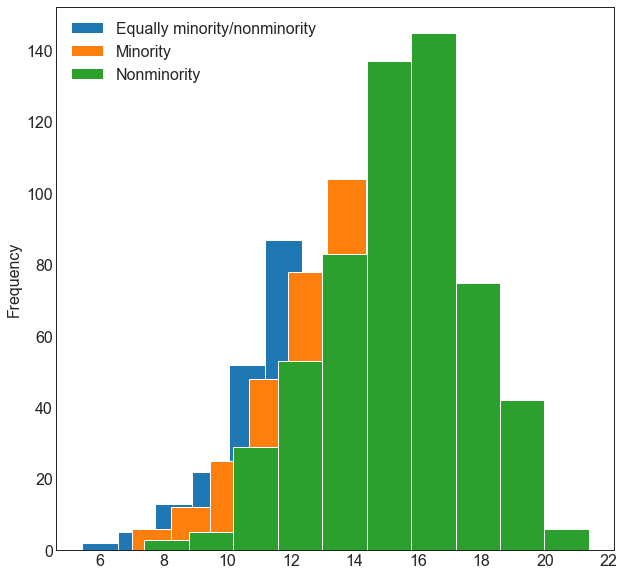

In [45]:
fig = plt.figure(figsize = (10,10))
df_race.groupby(df_race.race_group_ttl).payann_log.plot(kind = 'hist', legend = True)

In [ ]:
h4_target_vars = [df_vet_vet.emp_log,df_vet_equal.emp_log,df_vet_nonvet.emp_log]
h4_input_vars =['Vet', 'Equal Vet/Non-Vet', "Non-Vet"]
fig4 = vis.visualization_four(target_vars=h4_target_vars, input_vars=h4_input_vars)

In [46]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
anova_race = ols('payann_log ~ C(race_group_ttl)', data = df_race).fit()
print(anova_race.summary())

                            OLS Regression Results                            
Dep. Variable:             payann_log   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     248.2
Date:                Thu, 22 Aug 2019   Prob (F-statistic):           1.14e-92
Time:                        21:23:46   Log-Likelihood:                -2996.1
No. Observations:                1367   AIC:                             5998.
Df Residuals:                    1364   BIC:                             6014.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

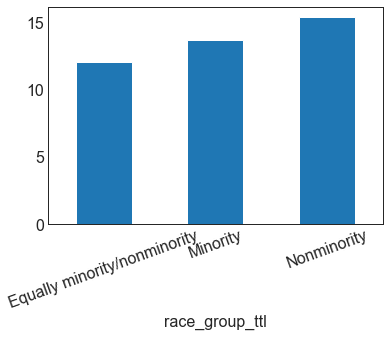

In [47]:
df_race.groupby(df_race.race_group_ttl).payann_log.mean().plot(kind = 'bar', figsize = (6,4))
plt.xticks(rotation=20)

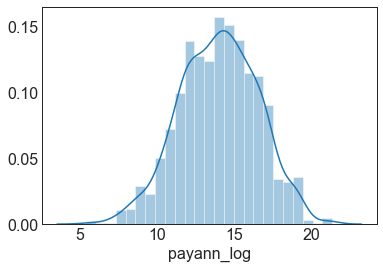

In [48]:
sns.distplot(df_race.payann_log,)

In [49]:
# import pingouin as pg
# two_way_anova = pg.anova(dv= between = ['payann_log','emp_log'], data = df_sex_female , detailed = True)

In [50]:
# import statsmodels.api as sm
# from statsmodels.formula.api import ols
# # H1: Different types of companies pay their employees equally
# results1 = ols('payann ~ C(naics2012)', data = df_category).fit()
# print(results1.summary())

In [ ]:
import numpy as np

[autoreload of py.test failed: Traceback (most recent call last):
  File "/Users/marissaeppes/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/marissaeppes/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 434, in superreload
    module = reload(module)
  File "/Users/marissaeppes/anaconda3/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/Users/marissaeppes/anaconda3/lib/python3.7/importlib/__init__.py", line 148, in reload
    raise ImportError(msg.format(name), name=name)
ImportError: module pytest not in sys.modules
]
[autoreload of _pytest._io.saferepr failed: Traceback (most recent call last):
  File "/Users/marissaeppes/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/marissaeppes/anaconda3/lib/python3.7/site-pa

In [51]:
# The code is wrong
# from scipy.stats import mstats
# pval = mstats.kruskalwallis(df_category1.payann_log for col in df_category1.columns,\
#                             df_category2.payann_log for col in df_category2.columns)

# args = [Data[col] for col in Data.columns]
# H, pval = mstats.kruskalwallis(*args)